### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from pandas import DatetimeIndex

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### Carregamento de Dados

In [2]:
dataOriginal = pd.read_csv('new_Global_Superstore2.csv', index_col=0, comment='#') 
df = dataOriginal 

In [3]:

print(df)


Index([], dtype='object')

Após fazer Label Encoding
        Ship Mode  Segment  City  State  Country  Market  Region  Quantity  \
Row ID                                                                       
32298           0        0     1      5       23       6       5       7.0   
26341           2        1     2      4        0       0       8       9.0   
25330           1        0     2      9        0       0       8       9.0   
13524           1        2     2      7        7       4       2       5.0   
47221           0        0     2      7       18       1       0       8.0   
...           ...      ...   ...    ...      ...     ...     ...       ...   
24175           3        2     2      9        0       0       8       5.0   
29002           0        1     2      7       18       0       7       5.0   
35398           3        0     2     11       23       6       2       1.0   
9596            3        2     2      7        1       5      10       2.0   
6147       

# Modelação

## Modelo de Árvore de decisão

Para utilizarmos árvores de decisão, temos de converter os dados com "string" para numéricos. 
E removemos colunas que não consideramos importantes.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


dataset = df



X = dataset.drop(['Profit'],axis=1)
y = dataset['Profit']

small_dataset = True
if small_dataset: 
    remove_n = 20000
    drop_indices = np.random.choice(dataset.index, remove_n, replace=False)
    dataset_subset = dataset.drop(drop_indices)
    X = dataset_subset.drop('Profit', axis=1)
    y = dataset_subset[['Profit']]


In [5]:
# Caso exista a coluna com "Order ID", temos de remover essa e outras colunas não apropriadas.

if 'Order ID' in X:
    X = X.drop(['Order ID', 'Customer ID', 'Customer Name' ],axis=1)

# Fazer label encoding de colunas que possam não ter sido já filtradas.
for coluna in X.select_dtypes(exclude=["number","bool_", "float64"]).columns:
    X = do_LabelEncoding(X, coluna)


RANDOM_SEED = 2021

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

dtr = DecisionTreeRegressor(random_state=RANDOM_SEED)
rfr = RandomForestRegressor(n_estimators=20, max_depth=10, criterion='squared_error' )

In [6]:
def analise_model(model): 
   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    predictions  = predictions.reshape(len(predictions),1 )
    # Métricas
    print(model)
    print("Parâmetros:")
    print(model.get_params())
    print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
    print("Mean Squared Error: ", mean_squared_error(y_test, predictions, squared=True))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    sns.histplot(y_test-predictions, bins=10,stat="density")
    plt.show()
    
    sns.displot(y_test-predictions)
    plt.show() 
    ax = plt.axes()
    ax.plot([-2000, -250, 0, 1500, 3000], [-2000, -250, 0, 1500, 3000], 'r')
    plt.scatter(y_test,predictions)
    plt.show()
    return predictions
    


# Estudar o de baixo
#print(metrics.r2_score(y_test,predictions ))

DecisionTreeRegressor(random_state=2021)
Parâmetros:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2021, 'splitter': 'best'}
Mean Absolute Error:  56.34479224038462
Mean Squared Error:  20621.474465513813
RMSE:  143.60179130329055


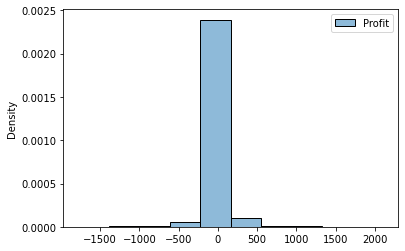

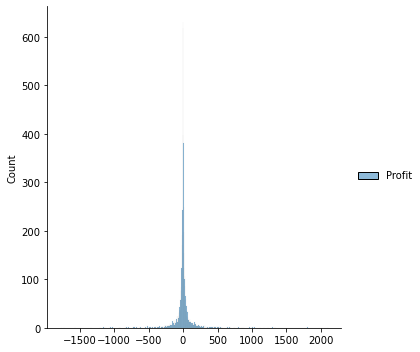

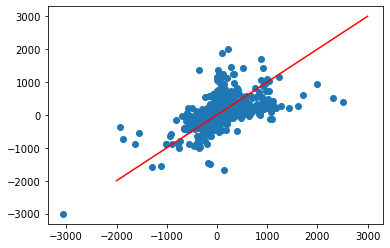

C:\Users\Diogo\AppData\Local\Temp\ipykernel_2092\1903837943.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=20, random_state=2021)
Parâmetros:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 2021, 'verbose': 0, 'warm_start': False}
Mean Absolute Error:  42.00522802477444
Mean Squared Error:  11623.998661262136
RMSE:  107.81464956703303


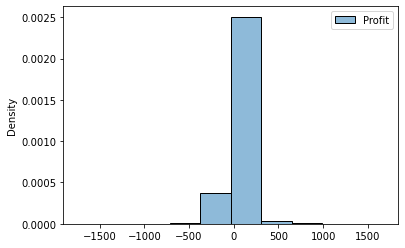

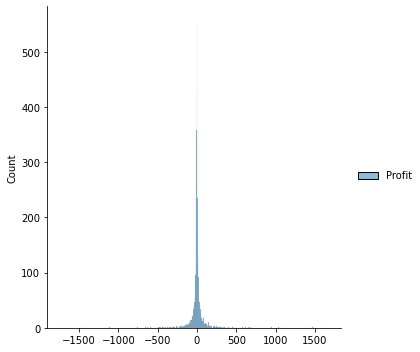

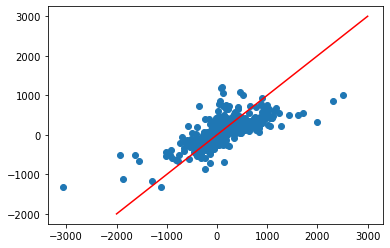

array([[248.31694939],
       [-47.16092227],
       [  5.62809022],
       ...,
       [-19.08892257],
       [  3.92695299],
       [  4.07911373]])

In [7]:
dtr = DecisionTreeRegressor(random_state=RANDOM_SEED)
rfr = RandomForestRegressor(n_estimators=20, max_depth=10, criterion='squared_error', random_state=RANDOM_SEED )
analise_model(dtr)
analise_model(rfr)


In [8]:
# Veio daqui:
# https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/


def hyper_param(model, params):
    print("Modelo atual: " , model)
    
    # cv = cross-validation generator
    # verbose = quanto é apresentado
    tuning_model=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=3)
    tuning_model.fit(X_train, y_train)
    
    return tuning_model.best_params_
    

In [9]:


def analise_worst_errors(predictions): 
   
    predictions  = predictions.reshape(len(predictions),1 )

    
 
    # Métricas
    print("Piores casos")
   
    only_bigger_than = mean_absolute_error(y_test, predictions)
    df = y_test-predictions
  

    df = df[df["Profit"] > only_bigger_than]
    sns.histplot(df, bins=10,stat="density")
    plt.show()
    
    sns.displot(df)
    plt.show() 

  
    


Modelo atual:  DecisionTreeRegressor(random_state=2021)
Melhores parâmetros:  {'max_depth': 3, 'max_features': 'auto', 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=2021)
DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=2021)
Parâmetros:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2021, 'splitter': 'best'}
Mean Absolute Error:  51.693955047397694
Mean Squared Error:  15788.123481247125
RMSE:  125.65079976365898


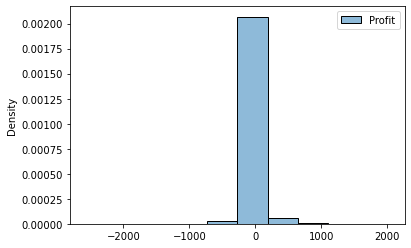

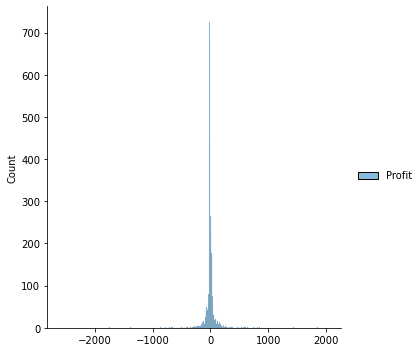

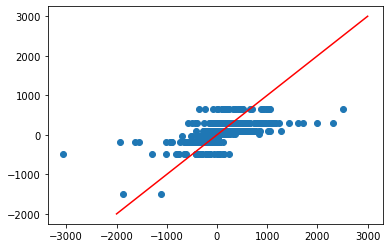

Modelo atual:  RandomForestRegressor(max_depth=10, n_estimators=20, random_state=2021)


C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Melhores parâmetros:  {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 100}
RandomForestRegressor(max_depth=10, random_state=2021)


C:\Users\Diogo\AppData\Local\Temp\ipykernel_2092\1903837943.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=2021)
Parâmetros:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2021, 'verbose': 0, 'warm_start': False}
Mean Absolute Error:  41.66305653912848
Mean Squared Error:  11364.385046236532
RMSE:  106.6038697526339


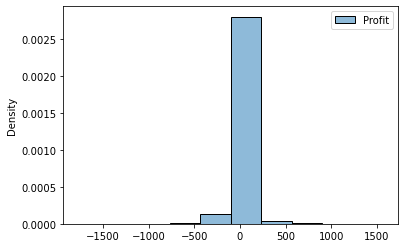

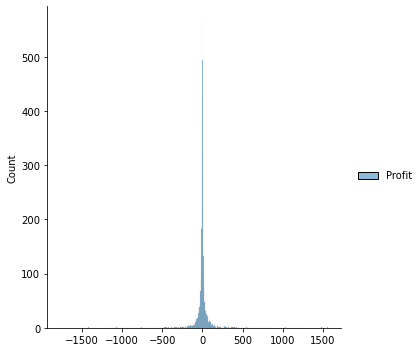

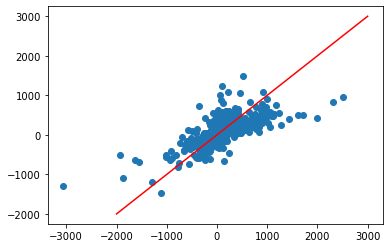

Piores casos


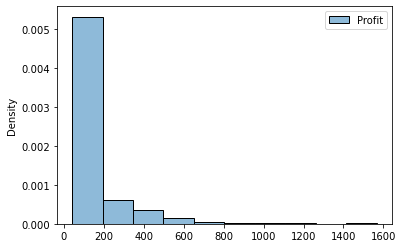

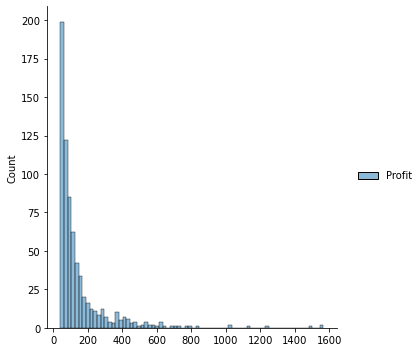

In [10]:

# Inclui os parâmetros default
parametersDRT={"splitter":["best","random"],
            "max_depth" : [3,7,12, None],

           "min_weight_fraction_leaf":[0.0, 0.2,0.5],
           "max_features":["auto","log2","sqrt",None],
           }


best_param1 = hyper_param(dtr, parametersDRT)

best_dtr = DecisionTreeRegressor(random_state=RANDOM_SEED)
print("Melhores parâmetros: ", best_param1)
print(best_dtr.set_params(**best_param1))
analise_model(best_dtr)


parametersRFR = {
            "n_estimators" : [20,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

best_param2 = hyper_param(rfr,parametersRFR)
best_rfr = RandomForestRegressor(n_estimators=20, max_depth=10, criterion='squared_error', random_state=RANDOM_SEED)
print("Melhores parâmetros: ", best_param2)
print(best_rfr.set_params(**best_param2))
predictions = analise_model(best_rfr)


#best_rfr.fit(X_train, y_train)
#predictionsXXX = best_rfr.predict(X_test)
analise_worst_errors(predictions)

# Análise da coluna objetivo

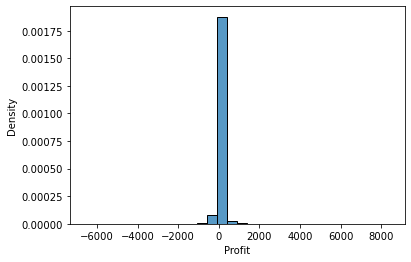

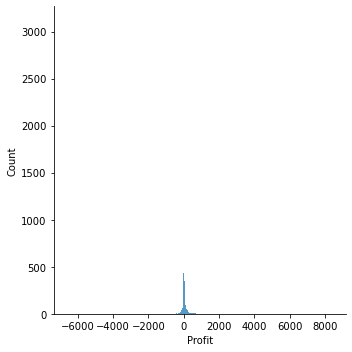

[-6599.978      0.         9.2551    36.8415  8399.976 ]


In [11]:
sns.histplot(dataset['Profit'], bins=30,stat="density")
plt.show()
    
sns.displot(dataset['Profit'])
plt.show() 


x = np.quantile(dataset['Profit'], [0,0.25,0.5,0.75,1])

print(x)
#plt.scatter(y_test,predictions)
#plt.show()

### Comentários aos resultados

A versão inicial, sem ajuste dos hiperparêmtros, não apresenta muitos erros, mas a versão após já ajustada consegue melhorar mais os resultados. Pelos gráficos podemos analisar quais as melhores versões.
Para além disso, o RandomForestRegressor continua a ser o melhor modelo, com uma diferença de ~~11376 - 10350 =~~ 1026.

Como a maior parte do lucro está concentrada entre 0 e 36 unidades monetárias, a média de erro pode ser considerada bastante má, porque tem o valor de 36. No entanto, tendo em conta a variação total do target, consideramos que o valor é bastante aceitável, porque 

Estou a avaliar com coisas incorretas, não está o dataset todo
